<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

d:\ProgramData\Anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [3]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./milan_listings.csv")

In [4]:
# Showing dataframe dimensions
listings_df.shape

(24346, 75)

In [5]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [6]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20240622024403,2024-06-22,city scrape,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,https://a0.muscache.com/pictures/474737/5955ba...,13822,https://www.airbnb.com/users/show/13822,Francesca,2009-04-17,"Milan, Italy","I'm am Francesca Sottilaro, i live in Milan an...",within a day,100%,0%,f,https://a0.muscache.com/im/users/13822/profile...,https://a0.muscache.com/im/users/13822/profile...,Zona 5,1,2,"['email', 'phone']",t,f,"Milan, Lombardy, Italy",TIBALDI,NaN,45.44119,9.17813,Private room in rental unit,Private room,1,3.5,3.5 baths,3.0,1.0,"[""Washer"", ""Heating"", ""TV"", ""Hangers"", ""Wifi"",...",$100.00,4,5,4,4,5,5,4.0,5.0,NaN,t,23,53,83,358,2024-06-22,10,0,0,2010-04-19,2019-04-13,4.89,5.00,5.00,5.00,5.00,4.56,4.67,NaN,f,1,0,1,0,0.06
1,304050,https://www.airbnb.com/rooms/304050,20240622024403,2024-06-23,city scrape,Good starting point to discover Mi,NaN,NaN,https://a0.muscache.com/pictures/4234186/e05e9...,1566887,https://www.airbnb.com/users/show/1566887,Elena,2012-01-04,"Milan, Italy",Hi! I'm a teacher of Italian to foreigners and...,within a day,60%,65%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Porta Vittoria,3,3,"['email', 'phone']",t,t,NaN,XXII MARZO,NaN,45.45709,9.21531,Private room in rental unit,Private room,1,1.0,1 private bath,1.0,1.0,"[""Washer"", ""Children\u2019s books and toys"", ""...",$60.00,2,15,2,2,15,15,2.0,15.0,NaN,t,5,7,9,221,2024-06-23,275,27,4,2012-09-08,2024-06-10,4.91,4.93,4.91,4.94,4.97,4.80,4.90,NaN,f,2,1,1,0,1.92
2,23986,https://www.airbnb.com/rooms/23986,20240622024403,2024-06-22,city scrape,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,NaN,https://a0.muscache.com/pictures/623d63f8-56cf...,95941,https://www.airbnb.com/users/show/95941,Jeremy,2010-03-19,"Milan, Italy","Hallo , I'm Jeremy Hayne I live in Milan and I...",within a day,100%,25%,f,https://a0.muscache.com/im/users/95941/profile...,https://a0.muscache.com/im/users/95941/profile...,Navigli,1,1,['email'],t,t,NaN,NAVIGLI,NaN,45.44806,9.17373,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Washer"", ""Heating"", ""...",$180.00,1,730,1,31,31,730,3.9,663.0,NaN,t,9,39,69,343,2024-06-22,27,2,0,2012-04-24,2024-04-20,4.65,4.67,4.22,4.59,4.74,4.70,4.48,NaN,f,1,1,0,0,0.18
3,309905,https://www.airbnb.com/rooms/309905,20240622024403,2024-06-22,city scrape,"Navigli LOFT, with private garden",A sunny two-floor loft with private garden,NaN,https://a0.muscache.com/pictures/4088248/415c2...,1593809,https://w

In [7]:
# Profiling general
# profile = ProfileReport(listings_df, title="Profiling Listing Milan")

In [8]:
#Generate Report
# profile.to_file('report2.html')

## 2. Cleaning and Quality

In [9]:
#Cambiar numericos por sting para tomarlo cómo categorico
listings_df['id']=listings_df['id'].apply(str)
listings_df['host_id']=listings_df['host_id'].apply(str)

In [10]:
#Funcion para separar comas y obtener cierto valor del listado.
def separa_por_coma(x,y):
    if(isinstance(x, str)):
        x=x.split(", ")
        if(len(x)<y):
            return ''
        return x[-y]
    else: return ''

In [11]:
#Creacion de columnas nuevas de country y city
listings_df['host_location_country']=listings_df['host_location'].apply(lambda x: separa_por_coma(x, 1))
listings_df['host_location_city']=listings_df['host_location'].apply(lambda x: separa_por_coma(x, 2))

In [12]:
def dias_entre_fechas(x):
    x = datetime.strptime(x, '%Y-%m-%d').date()
    return (date.today()-x).days

In [13]:
#Creación de columna nueva de dias de antiguedad del host
listings_df['host_since_days']=listings_df['host_since'].apply(dias_entre_fechas)
listings_df['host_since_months']=listings_df['host_since_days']/30

In [14]:
#verificar que la info de los host cuadre toda, que los host no tengan valores diferentes entre listings
df_by_host=listings_df[['id','host_id','host_name','host_listings_count','host_total_listings_count']].groupby(["host_id"],as_index=False).agg({
    'host_name': ['nunique'],
    'host_listings_count' :['nunique'],
    'host_total_listings_count' :['nunique']
})
df_by_host.columns = list(map(''.join, df_by_host.columns.values)) #cambia el multiindex por columnas agrupadas
df_by_host.host_listings_countnunique.unique()

array([1], dtype=int64)

In [15]:
#Correguir los errores de 0 bath
listings_df[listings_df['bathrooms_text'].isin(['0 shared baths'])]['room_type'].value_counts()

Private room    10
Name: room_type, dtype: int64

In [16]:
#Correguir los errores de 0 bath
listings_df.loc[(listings_df['bathrooms_text']=='0 baths')&(listings_df['room_type']=='Entire home/apt'),'bathrooms_text']='1 bath'
listings_df.loc[(listings_df['bathrooms_text']=='0 baths')&(listings_df['room_type']=='Private room'),'bathrooms_text']='shared bath'

In [17]:
#new feature bathrooms summarized
def simple_baths(x):
    if(isinstance(x, str)):
        if(x=='shared bath' or 'alf-bath' in x):
            return 'shared bath'
        else:
            x=float(x.split(' ')[0])
        if(1<=x<2) : return'1'
        elif(2<x<=3): return '2-3'
        else: return '4+'
    return x

listings_df['bathrooms_group']=listings_df['bathrooms_text'].apply(simple_baths)

In [18]:
listings_df[['minimum_nights']].sort_values(by=['minimum_nights']).value_counts(normalize=True, sort=False).cumsum().head(15)

minimum_nights
1                 0.474164
2                 0.783332
3                 0.879528
4                 0.908404
5                 0.928613
6                 0.934650
7                 0.946316
8                 0.946767
9                 0.946932
10                0.950341
12                0.950587
13                0.950670
14                0.952395
15                0.956543
16                0.956625
dtype: float64

In [19]:
listings_df.drop(list(listings_df[listings_df['minimum_nights']>15].index),inplace=True)

In [20]:
#Transform the price attribute from object to float
listings_df["price"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

#Eliminar registros sin precio (1231)
listings_df.drop(list(listings_df[listings_df['price'].isna()].index),inplace=True)

In [21]:
#Revisar outliers superiores
outlier_threshold = listings_df['price'].mean() + listings_df['price'].std() * 10 #9422
#Revisando las urls de los listings por encima de outlier se opta por eliminar los superiores de 9999
listings_df[listings_df['price'] >= outlier_threshold][['listing_url','price']].sort_values(by=['price'], ascending=True)

,listing_url,price
16046,https://www.airbnb.com/rooms/950491133042467150,9857.0
3686,https://www.airbnb.com/rooms/24054647,9999.0
3841,https://www.airbnb.com/rooms/24420532,9999.0
5513,https://www.airbnb.com/rooms/36340639,9999.0
6073,https://www.airbnb.com/rooms/40609622,9999.0
10174,https://www.airbnb.com/rooms/642477202207315778,9999.0
13272,https://www.airbnb.com/rooms/847556660667601197,9999.0
4438,https://www.airbnb.com/rooms/29981740,10000.0
4440,https://www.airbnb.com/rooms/29982168,10000.0
12298,https://www.airbnb.com/rooms/807184484164759282,10000.0


In [22]:
#Eliminar outliers superiores (16)
listings_df.drop(list(listings_df[listings_df['price'] >= 9999][['listing_url','price']].index),inplace=True)

In [23]:
listings_df.shape

(22148, 80)

## 2. Univariate analysis

#### 2.1 Atributos principales

##### Price

In [24]:
listings_df['price'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    22148.000000
mean       167.952772
std        342.616165
min         12.000000
5%          55.000000
25%         82.000000
50%        110.000000
75%        165.000000
95%        400.000000
max       9857.000000
Name: price, dtype: float64

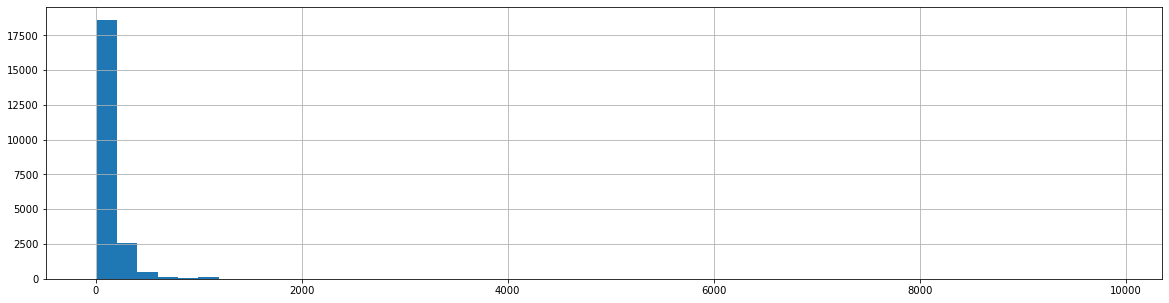

In [25]:
fig = plt.figure(figsize = (20, 5))
listings_df['price'].hist(bins=50)
plt.show()

In [26]:
# Computing skewness and kurtosis
print("Skewness:", listings_df['price'].skew())
print("Kurtosis:", listings_df['price'].kurtosis())

Skewness: 17.19080980494691
Kurtosis: 378.7274186797415


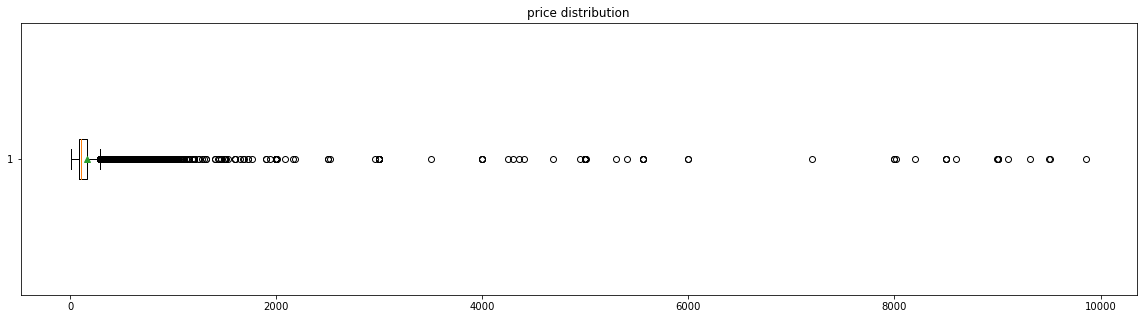

In [27]:
# Plotting a boxplot for price
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["price"], showmeans=True, vert=False)
plt.title("price distribution")
plt.show()

##### Review Score

In [28]:
listings_df['review_scores_rating'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    18674.000000
mean         4.708997
std          0.423065
min          0.000000
5%           4.000000
25%          4.620000
50%          4.830000
75%          5.000000
95%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

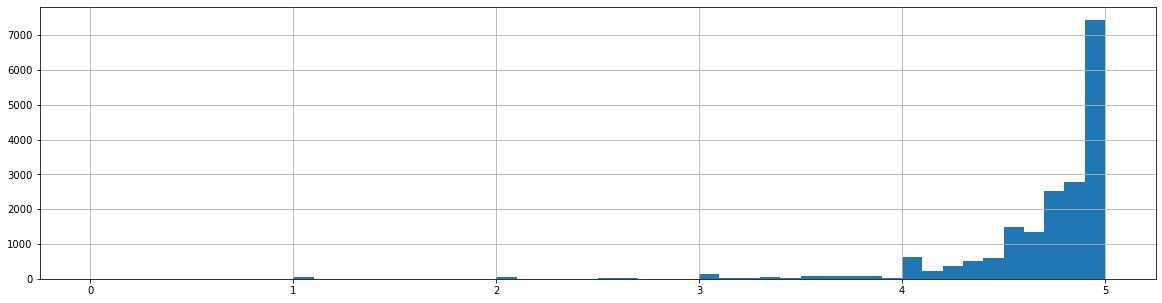

In [29]:
fig = plt.figure(figsize = (20, 5))
listings_df['review_scores_rating'].hist(bins=50)
plt.show()

In [30]:
# Computing skewness and kurtosis
print("Skewness:", listings_df['review_scores_rating'].skew())
print("Kurtosis:", listings_df['review_scores_rating'].kurtosis())

Skewness: -3.6859390194877766
Kurtosis: 21.69770432896838


d:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_scores_rating'>

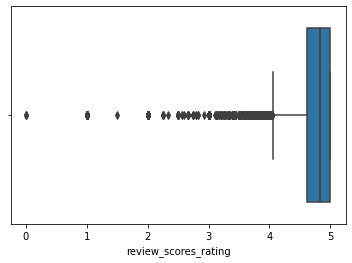

In [31]:
sns.boxplot(listings_df['review_scores_rating'])

##### Neighbourhood

In [32]:
listings_df['neighbourhood_cleansed'].value_counts(normalize=True).head(10)

BUENOS AIRES - VENEZIA    0.079691
DUOMO                     0.060141
SARPI                     0.042938
BRERA                     0.042442
LORETO                    0.040410
NAVIGLI                   0.039462
TICINESE                  0.038559
CENTRALE                  0.038333
ISOLA                     0.032599
XXII MARZO                0.027587
Name: neighbourhood_cleansed, dtype: float64

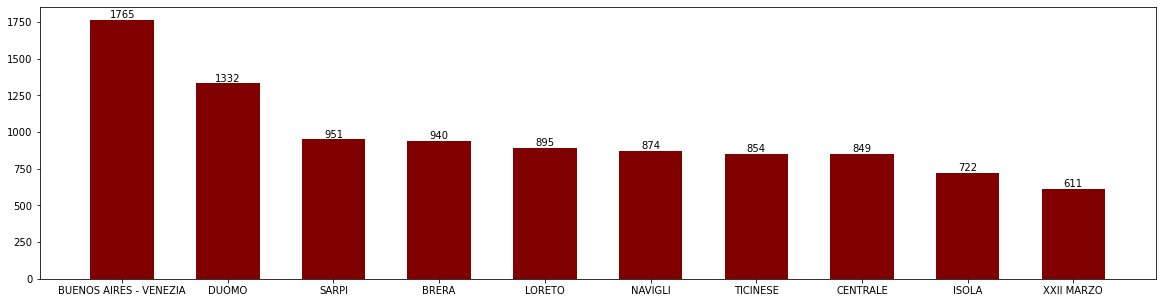

In [33]:
x=listings_df['neighbourhood_cleansed'].value_counts().head(10)
fig, ax = plt.subplots(figsize = (20, 5))
bars = ax.bar(x.index, x.values, color ='maroon', width = 0.6)
ax.bar_label(bars)
plt.show()

##### Accommodates

In [34]:
listings_df['accommodates'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    22148.000000
mean         3.233836
std          1.492988
min          1.000000
5%           2.000000
25%          2.000000
50%          3.000000
75%          4.000000
95%          6.000000
max         16.000000
Name: accommodates, dtype: float64

In [35]:
listings_df['accommodates'].value_counts(normalize=True)

2     0.380847
4     0.329465
3     0.121681
6     0.056258
1     0.045151
5     0.045106
8     0.009120
7     0.006818
10    0.002258
9     0.001490
16    0.000497
12    0.000452
11    0.000316
14    0.000271
13    0.000181
15    0.000090
Name: accommodates, dtype: float64

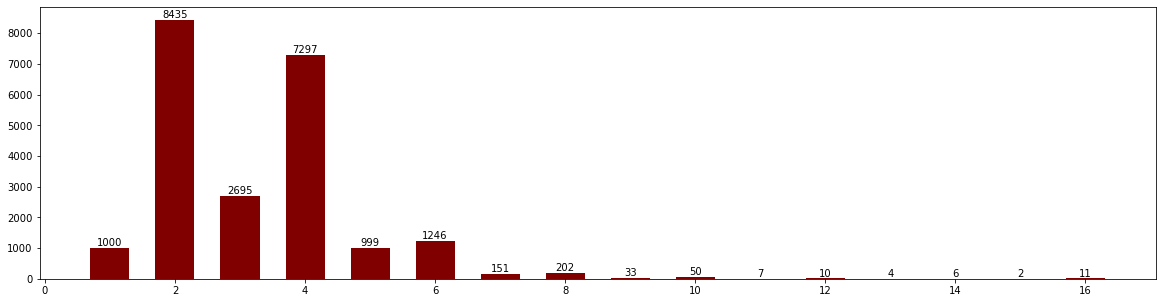

In [36]:
x=listings_df['accommodates'].value_counts()
fig, ax = plt.subplots(figsize = (20, 5))
bars = ax.bar(x.index, x.values, color ='maroon', width = 0.6)
ax.bar_label(bars)
plt.show()

##### Bathrooms_text

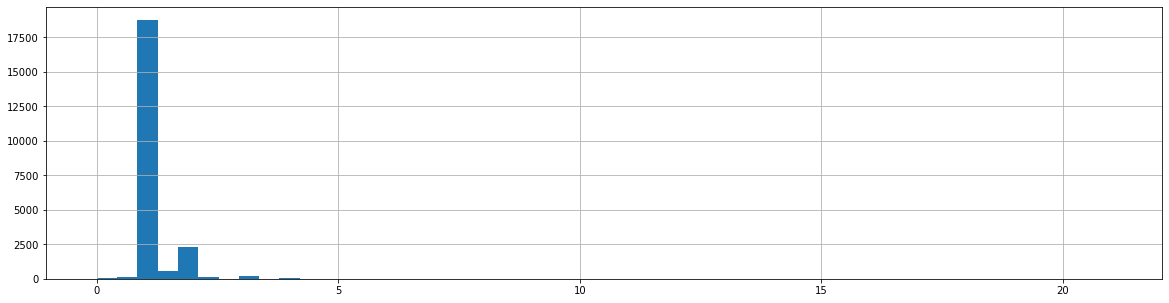

In [37]:
fig = plt.figure(figsize = (20, 5))
listings_df['bathrooms'].hist(bins=50)
plt.show()

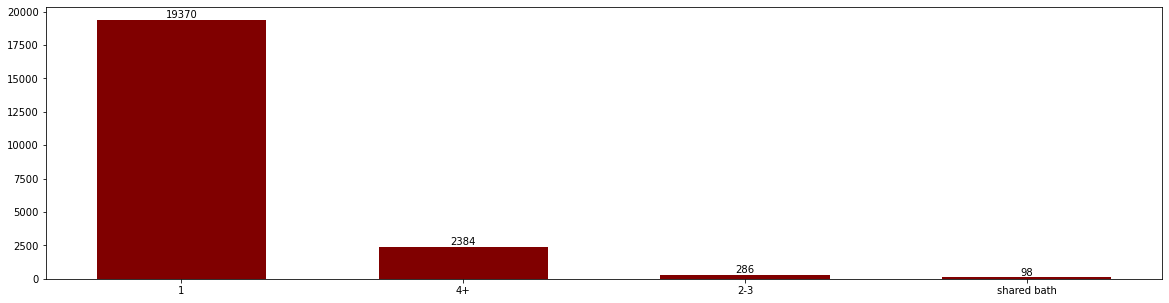

In [38]:
x=listings_df['bathrooms_group'].value_counts()
fig, ax = plt.subplots(figsize = (20, 5))
bars = ax.bar(x.index, x.values, color ='maroon', width = 0.6)
ax.bar_label(bars)
plt.show()

In [39]:
listings_df['bathrooms_group'].value_counts(normalize=True)

1              0.874966
4+             0.107688
2-3            0.012919
shared bath    0.004427
Name: bathrooms_group, dtype: float64

#### 2.1 Otros atributos

In [40]:
#Revisión general de los hosts
df_by_host=listings_df[['id','host_id','host_name','host_listings_count','host_total_listings_count']].groupby(["host_id"],as_index=False).agg({
    'id': ['count'],
    'host_name': ['max'],
    'host_listings_count' :['max'],
    'host_total_listings_count' :['max']
})
df_by_host.columns = list(map(''.join, df_by_host.columns.values)) #cambia el multiindex por columnas agrupadas
#Hosts with more lists
df_by_host=df_by_host.sort_values(by=['idcount'], ascending=False).reset_index()
df_by_host.head(10)

,index,host_id,idcount,host_namemax,host_listings_countmax,host_total_listings_countmax
0,4655,27693585,495,Italianway,511,547
1,12163,9025189,312,Easylife House,367,404
2,1998,16366171,236,Cleanbnb House,301,477
3,4138,2504885,147,Simone,154,155
4,3642,230140176,130,Youhosty,145,239
5,7412,4417813,129,The Best Rent,223,345
6,1584,14743308,102,Casa Da Suite,125,135
7,2602,18593362,99,Hintown,185,481
8,9626,54050937,99,I-Host,125,146
9,1848,158317747,97,Giulio,109,115


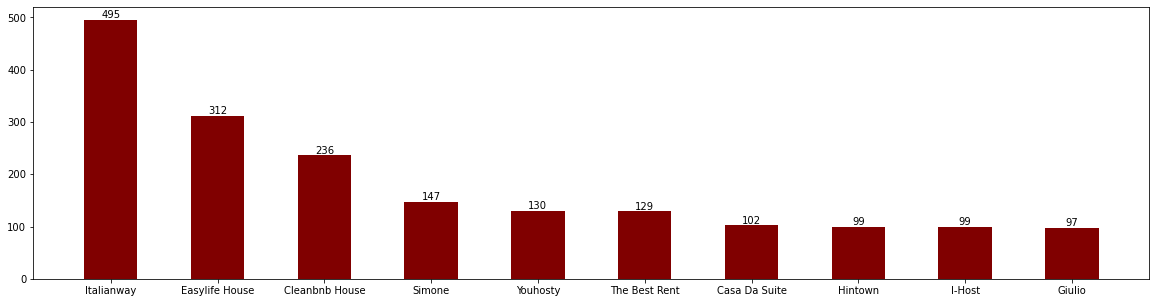

In [41]:
x=df_by_host[['host_namemax','idcount']].sort_values(by=['idcount'], ascending=False).head(10)

fig, ax = plt.subplots(figsize = (20, 5))
bars = ax.bar(x['host_namemax'], x['idcount'], color ='maroon', width = 0.5)
ax.bar_label(bars)
plt.show()

In [42]:
listings_df['host_location_country'].value_counts().head()

Italy             17603
                   4076
United Kingdom       76
Switzerland          58
Spain                50
Name: host_location_country, dtype: int64

In [43]:
listings_df[listings_df['host_location_city']!='']['host_location_city'].value_counts().head()

Milan       15792
Rome          162
Florence      114
Milano        106
Lombardy       90
Name: host_location_city, dtype: int64

In [44]:
listings_df['host_response_rate'].value_counts(normalize=True).head(10)

100%    0.706516
98%     0.065675
99%     0.054755
90%     0.022048
0%      0.018876
85%     0.013260
97%     0.012428
95%     0.009932
80%     0.009048
50%     0.008580
Name: host_response_rate, dtype: float64

In [45]:
listings_df['host_acceptance_rate'].value_counts(normalize=True).head(10)

100%    0.489141
99%     0.089170
0%      0.057055
98%     0.043389
97%     0.027478
95%     0.021475
96%     0.017619
50%     0.016985
94%     0.013666
88%     0.011567
Name: host_acceptance_rate, dtype: float64

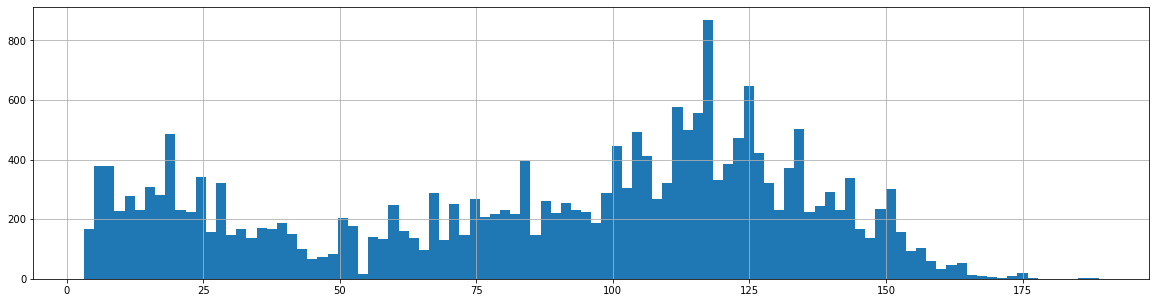

In [46]:
plt.figure(figsize = (20, 5))
listings_df['host_since_months'].hist(bins=100)
plt.show()

In [47]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Entire home/apt    0.866128
Private room       0.125339
Shared room        0.007901
Hotel room         0.000632
Name: room_type, dtype: float64

In [48]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    22148.000000
mean         3.233836
std          1.492988
min          1.000000
5%           2.000000
25%          2.000000
50%          3.000000
75%          4.000000
95%          6.000000
max         16.000000
Name: accommodates, dtype: float64

In [49]:
# Calculating basic statistics of accommodates
listings_df["bathrooms"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    22141.000000
mean         1.145386
std          0.432060
min          0.000000
5%           1.000000
25%          1.000000
50%          1.000000
75%          1.000000
95%          2.000000
max         21.000000
Name: bathrooms, dtype: float64

In [50]:
listings_df['bathrooms_group'].value_counts(normalize=True)

1              0.874966
4+             0.107688
2-3            0.012919
shared bath    0.004427
Name: bathrooms_group, dtype: float64

In [51]:
listings_df['bedrooms'].value_counts(normalize=True)

1.0     0.740490
2.0     0.167570
0.0     0.057016
3.0     0.028327
4.0     0.005060
5.0     0.001310
6.0     0.000090
8.0     0.000045
11.0    0.000045
7.0     0.000045
Name: bedrooms, dtype: float64

In [52]:
listings_df['beds'].value_counts(normalize=True)

1.0     0.374004
2.0     0.334344
0.0     0.131519
3.0     0.096840
4.0     0.040656
5.0     0.011952
6.0     0.006248
7.0     0.002083
8.0     0.001177
9.0     0.000453
10.0    0.000226
12.0    0.000181
14.0    0.000136
11.0    0.000091
17.0    0.000045
18.0    0.000045
Name: beds, dtype: float64

In [53]:
listings_df['number_of_reviews_ltm'].describe()

count    22148.000000
mean        12.453585
std         20.582609
min          0.000000
25%          0.000000
50%          4.000000
75%         15.000000
max        431.000000
Name: number_of_reviews_ltm, dtype: float64

In [54]:
listings_df['reviews_per_month'].describe()

count    18674.000000
mean         1.782753
std          2.037160
min          0.010000
25%          0.360000
50%          1.000000
75%          2.470000
max         27.690000
Name: reviews_per_month, dtype: float64

## Save clean df

In [55]:
listings_df.to_csv('./milan_listings_clean.csv', index=False)

In [56]:
# Profiling general
# profile = ProfileReport(listings_df, title="Profiling Listing Milan")
# #Generate Report
# profile.to_file('report2.html')